
# **MSIN0231 Machine Learning for Business Individual assignment**



**Module Leader:** Bart Vanneste  
**Academic Year:** 2024/25  
**Term:** 2  
**Title:** Individual Assignment  
**Type:** Individual  
**Candidate Number:** MYBQ6  

## **Environment Configuration**

In [ ]:
!pip install --upgrade langchain google-generativeai

!pip install -U langchain-openai langchain-anthropic langchain-google-genai
!pip install -U langchain-community
!pip install wikipedia
!pip install textstat
!pip install wikipedia-api
!pip install sentence-transformers
!pip install fpdf




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.3/414.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.37
    Uninstalling langchain-core-0.3.37:
      Successfully uninstalled langchain-core-0.3.37
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
go

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=a754f88e3ac8eedf49e674b199d04b68e2ab1e92d0325f9e67078c2f43041bb5
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15384 sha256=2af1ad798846845cddc3bb11ba6a339bab9b389407f8fd5ca1262d25d4112660
  Stored in directory: /root/.cache/pip/wheels/0b/0f/39/e8214ec038ccd

In [ ]:

# Import required libraries
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer, util
from langchain.retrievers import WikipediaRetriever
from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage, SystemMessage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from langchain.retrievers import WikipediaRetriever
from langchain_openai import ChatOpenAI
from textstat import flesch_reading_ease
import wikipediaapi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import json
import time
from langchain.schema import HumanMessage
import re
import pandas as pd
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fpdf import FPDF



##**API Configuration and Model Classes**

In [ ]:
# Initialize model instances with your API keys
OPENAI_API_KEY = 'xyz'
CLAUDE_API_KEY = 'xyz'
GEMINI_API_KEY = 'xyz'
HF_TOKEN = 'xyz'
# Set temperature consistently for fair comparison
MODEL_TEMP = 0.3  # Ensures factual, structured responses across all models

In [ ]:
def get_response_time(start_time, end_time):
    """
    Calculate the time difference between start and end time
    Args:
        start_time: Start timestamp
        end_time: End timestamp
    Returns:
        Time difference in seconds
    """
    return end_time - start_time

In [ ]:
class OpenAIModel:
    """Generates industry reports using OpenAI GPT-4."""

    def __init__(self):
        # userdata.get('OPENAI_API_KEY')  # Removed or replaced with appropriate API key retrieval
        self.chat = ChatOpenAI(
            model_name="gpt-4",
            openai_api_key=OPENAI_API_KEY, # Using the global OPENAI_API_KEY variable directly
            max_tokens=5000,
            temperature=MODEL_TEMP
        )

    def generate_report(self, prompt, system_prompt):
        start_time = time.time()
        messages = [SystemMessage(content=system_prompt), HumanMessage(content=prompt)]
        response = self.chat(messages)
        end_time = time.time()

        return response.content, end_time - start_time

In [ ]:
class ClaudeModel:
    """Generates industry reports using Claude 3.5."""

    def __init__(self):
        self.chat = ChatAnthropic(
            model_name="claude-3-5-sonnet-20241022",
            anthropic_api_key=CLAUDE_API_KEY,
            max_tokens=5000,
            temperature=MODEL_TEMP
        )

    def generate_report(self, prompt, system_prompt):
        start_time = time.time()
        messages = [HumanMessage(content=system_prompt + "\n\n" + prompt)]
        response = self.chat(messages)
        end_time = time.time()

        return response.content, end_time - start_time


In [ ]:
class GeminiModel:
    """Generates industry reports using Google Gemini."""

    def __init__(self):
        self.chat = ChatGoogleGenerativeAI(
            model="gemini-1.5-flash",
            google_api_key=GEMINI_API_KEY,
            temperature=MODEL_TEMP,
            max_output_tokens=5000
        )

    def generate_report(self, prompt, system_prompt):
        start_time = time.time()
        messages = [HumanMessage(content=system_prompt + "\n\n" + prompt)]
        response = self.chat(messages)
        end_time = time.time()

        return response.content, end_time - start_time


In [ ]:
# Initialize all three models
openai_model = OpenAIModel()
claude_model = ClaudeModel()
gemini_model = GeminiModel()

# Define models to use
models = {
  "OpenAI": openai_model,
  "Claude": claude_model,
  "Gemini": gemini_model
 }

## **Report Generation Process**

In [ ]:
test_industries = [
    "Renewable Energy",
    "Fashion & Apparel",
    "Financial Services",
    "Aerospace & Defense",
    "Healthcare Technology"
]

In [ ]:
import time
import json

test_prompt = """
You are a skilled market research assistant helping business analysts understand industries effectively.
Your task is to generate a clear, structured, and fact-based industry report using only information from Wikipedia.

### **Instructions:**
- **Fact-based:** Use only verified information from Wikipedia.
- **Industry-Specific:** The report must strictly focus on **{industry_name}**. Do not include any unrelated industries.
- **Word Count Range:** Ensure the entire report is between 400 and 600 words.
- **Concise:** Keep explanations clear and to the point, avoiding unnecessary details.
- **Consistent JSON format:** Structure the output in a well-formatted JSON format for easy readability.
- **Missing Data Handling:** If data is unavailable on Wikipedia, return **"Can't find on Wikipedia"** instead of making assumptions.
- **No External Data:** Do not use non-Wikipedia sources, estimations, or assumptions.

### **Report Format (JSON Output):**
{
  "industry": "{industry_name}",
  "overview": {
    "definition": "{Brief, clear definition of the industry from Wikipedia or 'Can't find on Wikipedia'}",
    "significance": "{Why this industry is important (economic, technological, environmental, or societal impact) from Wikipedia or 'Can't find on Wikipedia'}",
    "history": "{Key historical milestones relevant to the industry from Wikipedia or 'Can't find on Wikipedia'}",
    "key_products": [
      "{List of major products or services provided by the industry from Wikipedia or 'Can't find on Wikipedia'}"
    ],
    "market_size_and_growth_rate": "{Global market size, growth rate, and CAGR over a specific period from Wikipedia or 'Can't find on Wikipedia'}"
  },
  "geographical_distribution": {
    "leading_regions": "{Major countries or regions dominating the industry from Wikipedia or 'Can't find on Wikipedia'}",
    "emerging_markets": "{Regions with high growth potential from Wikipedia or 'Can't find on Wikipedia'}"
  },
  "regulatory_landscape": {
    "key_regulations": "{Major global or regional regulations affecting the industry from Wikipedia or 'Can't find on Wikipedia'}",
    "governing_bodies": "{Regulatory authorities overseeing industry operations from Wikipedia or 'Can't find on Wikipedia'}"
  },
  "technological_innovations": [
    {
      "technology": "{Name of technology from Wikipedia or 'Can't find on Wikipedia'}",
      "description": "{How this technology is applied in the industry from Wikipedia or 'Can't find on Wikipedia'}",
      "impact": "{How this innovation is transforming the sector from Wikipedia or 'Can't find on Wikipedia'}"
    }
  ],
  "market_trends": [
    {
      "trend": "{Trend Name from Wikipedia or 'Can't find on Wikipedia'}",
      "description": "{Detailed explanation of the trend with numerical evidence where applicable from Wikipedia or 'Can't find on Wikipedia'}",
      "impact": "{How this trend influences the industry’s direction from Wikipedia or 'Can't find on Wikipedia'}",
      "source": "{Wikipedia section reference or 'Can't find on Wikipedia'}"
    }
  ],
  "key_players": [
    {
      "company": "{Company Name from Wikipedia or 'Can't find on Wikipedia'}",
      "description": "{Company's role in the industry from Wikipedia or 'Can't find on Wikipedia'}",
      "market_position": "{Market share, ranking, or influence with year from Wikipedia or 'Can't find on Wikipedia'}",
      "ownership": "{Publicly traded or privately owned from Wikipedia or 'Can't find on Wikipedia'}",
      "headquarters": "{Company headquarters location from Wikipedia or 'Can't find on Wikipedia'}",
      "employee_count": "{Number of employees with year from Wikipedia or 'Can't find on Wikipedia'}",
      "financials": {
        "annual_revenue": "{Latest revenue with year from Wikipedia or 'Can't find on Wikipedia'}",
        "net_profit": "{Most recent net profit/loss with year from Wikipedia or 'Can't find on Wikipedia'}",
        "stock_price": "{Current stock price if publicly traded from Wikipedia or 'Can't find on Wikipedia'}",
        "market_cap": "{Market capitalization value from Wikipedia or 'Can't find on Wikipedia'}"
      },
      "wikipedia_url": "{Direct Wikipedia page link or 'Can't find on Wikipedia'}"
    }
  ],
  "opportunities": [
    {
      "opportunity": "{Business Opportunity from Wikipedia or 'Can't find on Wikipedia'}",
      "description": "{A growth or innovation opportunity within the industry from Wikipedia or 'Can't find on Wikipedia'}",
      "reasoning": "{Why this opportunity exists and how businesses can capitalize on it from Wikipedia or 'Can't find on Wikipedia'}",
      "source": "{Wikipedia reference or 'Can't find on Wikipedia'}"
    }
  ],
  "challenges": [
    {
      "challenge": "{Industry Challenge from Wikipedia or 'Can't find on Wikipedia'}",
      "description": "{A major obstacle or risk faced by the industry from Wikipedia or 'Can't find on Wikipedia'}",
      "implication": "{How this challenge affects businesses and potential solutions from Wikipedia or 'Can't find on Wikipedia'}",
      "source": "{Wikipedia reference or 'Can't find on Wikipedia'}"
    }
  ],
  "future_outlook": {
    "growth_projections": "{Predicted market size or CAGR for the next 5-10 years from Wikipedia or 'Can't find on Wikipedia'}",
    "disruptive_factors": "{Technological advancements, regulatory changes, or economic factors affecting the industry from Wikipedia or 'Can't find on Wikipedia'}",
    "key_recommendations": "{Strategic insights for businesses or investors on adapting to future changes from Wikipedia or 'Can't find on Wikipedia'}"
  },
  "references": [
    {
      "source": "Wikipedia",
      "url": "https://en.wikipedia.org/wiki/{industry_name}"
    }
  ]
}

### **Word Count Guidelines:**
- **Overview Section (200 words total):**
  - Definition: 30–50 words
  - Significance: 30–50 words
  - History: 40–60 words
  - Key Products: 40–60 words
  - Market Size and Growth Rate: 40–50 words

- **Geographical Distribution (50 words total):**
  - Leading Regions: 30–40 words
  - Emerging Markets: 10–20 words

- **Regulatory Landscape (50 words total):**
  - Key Regulations: 20–30 words
  - Governing Bodies: 20–30 words

- **Technological Innovations (50 words total):**
  - Technology details: 30–40 words
  - Impacts: 10–20 words

- **Market Trends (50 words total):**
  - Each Trend (up to 3 trends): ~15 words each
  - Impact and source: 5–10 words each

- **Key Players (50 words total):**
  - Company details: ~25 words for 2 companies
  - Financials and market position: ~25 words

- **Opportunities (50 words total):**
  - Opportunity details: 30–40 words
  - Reasoning and source: 10–20 words

- **Challenges (50 words total):**
  - Challenge details: 30–40 words
  - Implications and source: 10–20 words

- **Future Outlook (50 words total):**
  - Growth Projections: 20–30 words
  - Disruptive Factors: 10–20 words
  - Recommendations: 10–20 words

### **Important Final Note:**
- **Double-check the industry name in the report.** The output **must match** `{industry_name}`.
- **If incorrect information is generated, discard and regenerate the report.**
- **Do not substitute another industry if data is missing. Instead, state "Can't find on Wikipedia".**

Generate a Wikipedia-based industry report between 400 and 600 words for: **{industry_name}**.
"""



def generate_report(industry, model, prompt):  # Modified function signature
    """
    Generate industry report using specified model and custom prompt
    # ... (docstring remains the same) ...
    """
    start_time = time.time()
    prompt = prompt.replace("{industry_name}", industry)

    # Generate response
    messages = [HumanMessage(content=prompt)]
    response = model.chat(messages)

    end_time = time.time()
    response_time = end_time - start_time

    return response.content, response_time


In [ ]:
# This script generates and analyzes industry reports using multiple AI models.
# It uses a structured JSON template to ensure consistent output format and
# compares the performance and quality of different LLMs.

def generate_industry_reports(industries, models, prompt_template):
    """
    Generates industry reports using specified models and a consistent prompt template.

    Args:
        industries (list): List of industry names to analyze
        models (dict): Dictionary mapping model names to model instances
        prompt_template (str): Template for generating reports with {industry} placeholder

    Returns:
        dict: Generated reports with performance metrics
    """
    # Dictionary to store reports for all models
    generated_reports = {}

    # Generate reports using all models
    for model_name, model in models.items():
        generated_reports[model_name] = {}

        for industry in industries:
            print("Generating report for {} using {}...".format(industry, model_name))

            # Replace industry placeholder in the prompt
            industry_prompt = prompt_template.replace("{industry_name}", industry)
            # Generate report using the model
            start_time = time.time()
            messages = [HumanMessage(content=industry_prompt)]
            response = model.chat(messages)
            end_time = time.time()

            response_time = end_time - start_time
            report = response.content

            generated_reports[model_name][industry] = {
                "report": report,
                "response_time": response_time
            }

    # Save reports to a JSON file
    output_file = "generated_reports.json"
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(generated_reports, f, indent=4)

    print("Reports generated and saved successfully in {}!".format(output_file))
    return generated_reports


In [ ]:
reports = generate_industry_reports(test_industries, models, test_prompt)

Generating report for Renewable Energy using OpenAI...


<ipython-input-11-0b0a11282c87>:32: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = model.chat(messages)


Generating report for Fashion & Apparel using OpenAI...
Generating report for Financial Services using OpenAI...
Generating report for Aerospace & Defense using OpenAI...
Generating report for Healthcare Technology using OpenAI...
Generating report for Renewable Energy using Claude...
Generating report for Fashion & Apparel using Claude...
Generating report for Financial Services using Claude...
Generating report for Aerospace & Defense using Claude...
Generating report for Healthcare Technology using Claude...
Generating report for Renewable Energy using Gemini...
Generating report for Fashion & Apparel using Gemini...
Generating report for Financial Services using Gemini...
Generating report for Aerospace & Defense using Gemini...
Generating report for Healthcare Technology using Gemini...
Reports generated and saved successfully in generated_reports.json!


In [ ]:
print("\nGenerated Reports:")
print(reports)


Generated Reports:
{'OpenAI': {'Renewable Energy': {'report': '{\n  "industry": "Renewable Energy",\n  "overview": {\n    "definition": "Renewable energy is energy that is collected from renewable resources, which are naturally replenished on a human timescale, such as sunlight, wind, rain, tides, waves, and geothermal heat.",\n    "significance": "Renewable energy plays a significant role in reducing greenhouse gas emissions. Using renewable energy can reduce the use of fossil fuels, which are major sources of U.S. carbon dioxide emissions.",\n    "history": "The use of renewable energy dates back to 200 BC in China, with the use of wind to pump water and grind grain. Modern interest in renewable energy development began in the 19th and 20th century.",\n    "key_products": [\n      "Solar power, Wind power, Hydroelectricity, Biomass, Biofuel, Geothermal energy"\n    ],\n    "market_size_and_growth_rate": "In 2019, the global renewable energy market was valued at $928 billion and is e

## **Technical Performance Evaluation**


This analysis evaluates how effectively different large language models (GPT-4, Claude, and Gemini) handle structured industry report generation tasks. By measuring technical performance metrics across multiple industries, we can determine which model produces the most reliable and consistent outputs for business intelligence applications.

| Metric | Description | Success Criteria |
|--------|-------------|-----------------|
| **Word Count** | Report length | ≤ 600 words |
| **JSON Validity** | Parsable format | No syntax errors |
| **Structure Compliance** | Required sections | All template sections present |
| **Response Time** | Generation speed | Measured in seconds |

The technical evaluation framework provides an objective basis for comparing model capabilities, identifying their strengths and limitations for standardized business reporting tasks.

In [ ]:
# This code analyzes the word count of AI-generated industry reports from a JSON file.
# It checks if each report stays within the 600-word limit and highlights reports
# exceeding this limit in red, while those within the limit appear in green.

def calculate_word_count(json_file):
   """
   Calculates the word count for each report in the given JSON file.

   Args:
   - json_file (str): Path to the JSON file containing reports.

   Returns:
   - pd.DataFrame: A DataFrame with model, industry, and word count.
   """
   with open(json_file, "r", encoding="utf-8") as f:
       reports = json.load(f)

   word_counts = []

   for model, industries in reports.items():
       for industry, data in industries.items():
           report_text = data.get("report", "")

           # Extract word count using regex to count words
           word_count = len(re.findall(r'\w+', report_text))

           word_counts.append({
               "Model": model,
               "Industry": industry,
               "Word Count": word_count
           })

   df_word_counts = pd.DataFrame(word_counts)
   return df_word_counts

# Process the JSON file
json_file_path = "generated_reports.json"  # Update this if needed
df_word_counts = calculate_word_count(json_file_path)

# This function determines the color for word count values
def color_word_count(val):
   """Colors the word count based on threshold."""
   color = 'red' if val >= 600 else 'green'
   return 'color: {}'.format(color)

# Apply styling to DataFrame to visually indicate which reports exceed the word limit
styled_df = df_word_counts.style.applymap(color_word_count, subset=["Word Count"])

# Display DataFrame
import IPython.display as display
display.display(styled_df)


<ipython-input-14-501b49c0ffab>:47: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df_word_counts.style.applymap(color_word_count, subset=["Word Count"])


,Model,Industry,Word Count
0,OpenAI,Renewable Energy,540
1,OpenAI,Fashion & Apparel,376
2,OpenAI,Financial Services,543
3,OpenAI,Aerospace & Defense,409
4,OpenAI,Healthcare Technology,451
5,Claude,Renewable Energy,424
6,Claude,Fashion & Apparel,418
7,Claude,Financial Services,452
8,Claude,Aerospace & Defense,420
9,Claude,Healthcare Technology,408


In [ ]:


def validate_json_reports(json_file):
    """
    Checks if the reports in the given JSON file are valid JSON.

    Args:
    - json_file (str): Path to the JSON file containing reports.

    Returns:
    - pd.DataFrame: A DataFrame containing model, industry, and JSON validity status.
    """
    try:
        with open(json_file, "r", encoding="utf-8") as f:
            reports = json.load(f)  # Load the main JSON file
    except (json.JSONDecodeError, FileNotFoundError) as e:
        return pd.DataFrame({"Error": [str(e)]})  # Return an error DataFrame

    json_validity = []

    for model, industries in reports.items():
        for industry, data in industries.items():
            report_text = data.get("report", "")

            # Validate JSON format
            if isinstance(report_text, dict):
                is_valid = "Valid"
            elif isinstance(report_text, str):
                try:
                    json.loads(report_text)  # Attempt to parse JSON string
                    is_valid = "Valid"
                except json.JSONDecodeError:
                    is_valid = "Invalid"
            else:
                is_valid = "Invalid"

            json_validity.append({
                "Model": model,
                "Industry": industry,
                "JSON Valid": is_valid
            })

    return pd.DataFrame(json_validity)


df_json_validity = validate_json_reports(json_file_path)
display.display(df_json_validity)


,Model,Industry,JSON Valid
0,OpenAI,Renewable Energy,Valid
1,OpenAI,Fashion & Apparel,Valid
2,OpenAI,Financial Services,Valid
3,OpenAI,Aerospace & Defense,Valid
4,OpenAI,Healthcare Technology,Valid
5,Claude,Renewable Energy,Valid
6,Claude,Fashion & Apparel,Valid
7,Claude,Financial Services,Valid
8,Claude,Aerospace & Defense,Valid
9,Claude,Healthcare Technology,Valid


In [ ]:
def validate_report_structure(json_file, required_sections, json_validity_df):
    """
    Validates if each valid JSON report contains the necessary structure.

    Args:
    - json_file (str): Path to the JSON file.
    - required_sections (list): List of required top-level sections.
    - json_validity_df (pd.DataFrame): JSON validity DataFrame.

    Returns:
    - pd.DataFrame: A DataFrame showing which reports are correctly structured.
    """
    try:
        with open(json_file, "r", encoding="utf-8") as f:
            reports = json.load(f)  # Load JSON file
    except (json.JSONDecodeError, FileNotFoundError) as e:
        return pd.DataFrame({"Error": [str(e)]})  # Return an error DataFrame

    structure_results = []
    json_validity_results = json_validity_df.to_dict(orient="records")  # Convert DataFrame to List of Dicts

    for entry in json_validity_results:
        model = entry["Model"]
        industry = entry["Industry"]
        json_valid = entry["JSON Valid"]

        if json_valid == "Invalid":
            structure_status = "Not a valid JSON file"
        else:
            # Extract report text
            report_text = reports.get(model, {}).get(industry, {}).get("report", "")

            # Ensure report_text is a valid JSON object, not a string
            if isinstance(report_text, str):
                try:
                    report_data = json.loads(report_text)  # Parse JSON
                except json.JSONDecodeError:
                    structure_status = "Invalid JSON format in report"
                    structure_results.append({
                        "Model": model,
                        "Industry": industry,
                        "Report Structure": structure_status
                    })
                    continue  # Skip further validation if JSON is invalid
            elif isinstance(report_text, dict):  # Already parsed JSON
                report_data = report_text
            else:
                structure_status = "Invalid report format"
                structure_results.append({
                    "Model": model,
                    "Industry": industry,
                    "Report Structure": structure_status
                })
                continue

            # Check for missing sections
            missing_sections = [s for s in required_sections if s not in report_data]

            # Determine report structure status
            if missing_sections:
                structure_status = f"Incomplete report structure - Missing: {', '.join(missing_sections)}"
            else:
                structure_status = "Fully structured report"

        structure_results.append({
            "Model": model,
            "Industry": industry,
            "Report Structure": structure_status
        })

    return pd.DataFrame(structure_results)


# Define correct required sections based on the JSON format
required_sections = [
    "industry", "overview", "market_trends", "key_players",
    "opportunities", "challenges", "future_outlook", "references"
]

df_structure_validity = validate_report_structure(json_file_path, required_sections, df_json_validity)  # Checks report structure


display.display(df_structure_validity)  # Show structure validity check


,Model,Industry,Report Structure
0,OpenAI,Renewable Energy,Fully structured report
1,OpenAI,Fashion & Apparel,Fully structured report
2,OpenAI,Financial Services,Fully structured report
3,OpenAI,Aerospace & Defense,Fully structured report
4,OpenAI,Healthcare Technology,Fully structured report
5,Claude,Renewable Energy,Fully structured report
6,Claude,Fashion & Apparel,Fully structured report
7,Claude,Financial Services,Fully structured report
8,Claude,Aerospace & Defense,Fully structured report
9,Claude,Healthcare Technology,Fully structured report


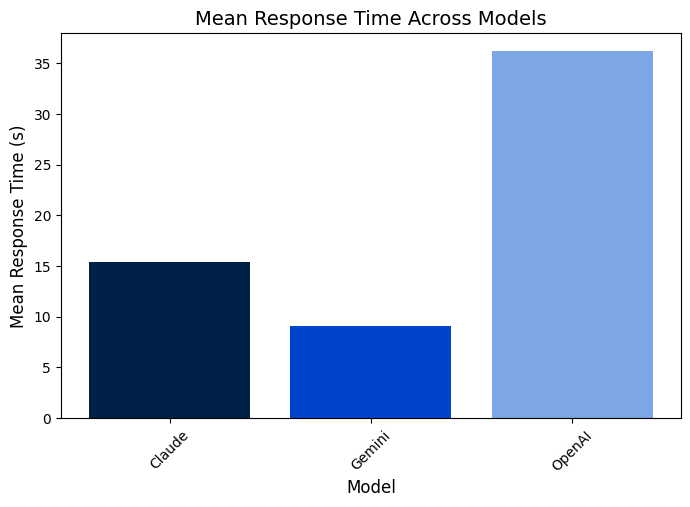

In [ ]:

def compare_response_time(json_file):
    """
    Calculates and compares the mean response time for different models.

    Args:
    - json_file (str): Path to the JSON file containing reports.

    Returns:
    - pd.DataFrame: A DataFrame showing the mean response time for each model.
    - Visualization: A bar chart comparing response times (using Matplotlib only).
    """
    with open(json_file, "r", encoding="utf-8") as f:
        reports = json.load(f)

    response_times = []

    for model, industries in reports.items():
        for industry, data in industries.items():
            response_time = data.get("response_time", 0)  # Default to 0 if missing

            response_times.append({
                "Model": model,
                "Industry": industry,
                "Response Time (s)": response_time
            })

    # Convert to DataFrame
    df_response = pd.DataFrame(response_times)

    # Calculate mean response time for each model
    mean_response = df_response.groupby("Model")["Response Time (s)"].mean().reset_index()

    # Matplotlib bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(mean_response["Model"], mean_response["Response Time (s)"], color=["#002147", "#0044CC", "#7CA6E6"])

    plt.title("Mean Response Time Across Models", fontsize=14)
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("Mean Response Time (s)", fontsize=12)
    plt.xticks(rotation=45)

    # Show plot
    plt.show()

    return mean_response

# Example Usage
json_file_path = "generated_reports.json"  # Update path if needed
df_mean_response = compare_response_time(json_file_path)



## **Wikipedia Integration and Performance Evaluation**

This analysis evaluates the factual accuracy and knowledge integration of large language models by measuring their performance against Wikipedia as a ground truth source.

| **Metric**              | **Description**                                           | **Interpretation**                                | **Success Criteria**                        |
|-------------------------|-----------------------------------------------------------|--------------------------------------------------|---------------------------------------------|
| **Wikipedia Similarity** | Semantic similarity between report and Wikipedia content | Ranges from 0 to 1                              | > 0.7 indicates high factual alignment      |
| **Wikipedia References**| Number of direct Wikipedia citations in the report       | Indicates external knowledge acknowledgment     | 1-2 references preferred                   |
| **Hallucinated Facts**  | Number of statements not supported by Wikipedia content  | Measures factual deviation                      | < 3 hallucinations per report  

In [ ]:

"""
This function uses LangChain's WikipediaRetriever to fetch real industry content from Wikipedia.
The function takes an industry name as input, retrieves relevant Wikipedia documents,
and returns the content of the first relevant document.

"""
wikipedia_retriever = WikipediaRetriever()

def get_wikipedia_data(industry_name):
    """
    Retrieves industry information from Wikipedia using LangChain's WikipediaRetriever.
    """
    retrieved_docs = wikipedia_retriever.get_relevant_documents(industry_name)
    return retrieved_docs[0].page_content if retrieved_docs else "Data not found."


In [ ]:

# This code implements Wikipedia integration for evaluating the factual accuracy of AI-generated reports.
# It uses BERT embeddings and TF-IDF to compute semantic similarity between reports and Wikipedia content.

# Load a pre-trained BERT sentence embedding model
bert_model = SentenceTransformer("all-MiniLM-L6-v2")

def compute_wikipedia_similarity(report_text, wiki_text):
   """
   Computes Wikipedia similarity using BERT embeddings for better semantic matching.

   Args:
   - report_text (str): AI-generated industry report.
   - wiki_text (str): Wikipedia content.

   Returns:
   - float: Cosine similarity score (0 to 1, where 1 means identical meaning).
   """
   if not report_text or not wiki_text:
       return 0.0

   # Generate sentence embeddings
   report_embedding = bert_model.encode([report_text])
   wiki_embedding = bert_model.encode([wiki_text])

   # Compute cosine similarity
   similarity_score = cosine_similarity(report_embedding, wiki_embedding)[0][0]

   return round(similarity_score, 2)  # Return similarity score rounded to 2 decimals


def fetch_wikipedia_data(industry_name):
    """
    Fetches Wikipedia data using LangChain's WikipediaRetriever.

    Args:
        industry_name (str): The name of the industry.

    Returns:
        str: Wikipedia content for the industry or an error message if not found.
    """
    retrieved_docs = wikipedia_retriever.get_relevant_documents(industry_name)

    if not retrieved_docs:
        print(f"[ERROR] Wikipedia retrieval failed: No data found for {industry_name}")
        return None

    # Merge multiple chunks into one Wikipedia text
    wiki_text = " ".join([doc.page_content for doc in retrieved_docs])

    print(f"\n[DEBUG] Wikipedia Data for {industry_name} (First 500 chars): {wiki_text[:500]}...\n")

    return wiki_text


def fetch_wikipedia_keywords(industry_name):
   """
   Fetches keywords related to an industry from Wikipedia using TF-IDF.

   Args:
       industry_name (str): The name of the industry.

   Returns:
       list: List of keywords or an empty list if no data found.
   """
   wiki_content = fetch_wikipedia_data(industry_name)
   if wiki_content:
       vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
       tfidf_matrix = vectorizer.fit_transform([wiki_content])
       keywords = vectorizer.get_feature_names_out().tolist()
       return keywords
   else:
       return []


def calculate_industry_relevance(report_text, industry):
   """
   Calculates cosine similarity between the report and industry-specific keywords.

   Args:
   - report_text (str): AI-generated industry report.
   - industry (str): Industry name.

   Returns:
   - float: Similarity score (higher = more relevant).
   """
   wiki_keywords = fetch_wikipedia_keywords(industry)

   if not report_text or not wiki_keywords:
       return 0.0

   # TF-IDF Vectorization
   vectorizer = TfidfVectorizer()
   tfidf_matrix = vectorizer.fit_transform([report_text, ' '.join(wiki_keywords)])  # Join keywords into a single string

   # Compute cosine similarity
   similarity_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
   return round(similarity_score, 2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import wikipediaapi

def extract_industry_keywords(industry):
    """
    Extracts key terms from a Wikipedia page using TF-IDF.

    Args:
    - industry (str): Industry name.

    Returns:
    - list: Top keywords for the given industry.
    """
    # Fetch Wikipedia content
    content = fetch_wikipedia_data(industry)
    if not content:
        return []  # Return empty if no Wikipedia data

    # Use TF-IDF to extract key terms
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    tfidf_matrix = vectorizer.fit_transform([content])

    return vectorizer.get_feature_names_out()


In [ ]:
def evaluate_industry_relevance(report_text, industry):
    """
    Evaluates how relevant the report is to the given industry.

    Args:
    - report_text (str): AI-generated report text.
    - industry (str): Industry category.

    Returns:
    - float: Relevance score (higher is better).
    """
    # Extract keywords from Wikipedia
    industry_keywords = extract_industry_keywords(industry)

    # Check if keywords appear in the report
    keyword_count = sum(report_text.lower().count(keyword) for keyword in industry_keywords)

    # Normalize by total words in report
    total_words = len(report_text.split())
    relevance_score = keyword_count / total_words if total_words > 0 else 0

    return relevance_score


In [ ]:
def compute_industry_relevance_all(reports):
    """
    Computes industry relevance for all AI-generated reports.

    Args:
    - reports (dict): Dictionary of model reports.

    Returns:
    - pd.DataFrame: Industry relevance scores.
    """
    relevance_results = []

    for model, industries in reports.items():
        for industry, data in industries.items():
            report_text = data.get("report", "")
            score = evaluate_industry_relevance(report_text, industry)

            relevance_results.append({
                "Model": model,
                "Industry": industry,
                "Industry Relevance Score": score
            })

    return pd.DataFrame(relevance_results)


In [ ]:

def plot_industry_relevance(df_results):
    """
    Plots industry relevance scores across models.

    Args:
    - df_results (pd.DataFrame): DataFrame containing industry relevance scores.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_results, x="Model", y="Industry Relevance Score", hue="Industry", palette="coolwarm")

    plt.title("Industry Relevance Score Across Models", fontsize=14)
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("Relevance Score", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Industry", bbox_to_anchor=(1,1))

    plt.show()



In [ ]:

def count_wikipedia_references(text):
    """Counts the number of Wikipedia references in a text using regex."""
    # This regex pattern looks for typical Wikipedia URL patterns
    wiki_references = re.findall(r"https?://[a-z]+\.wikipedia\.org/wiki/\S+", text)
    return len(wiki_references)


def detect_hallucinations(report_text, wiki_text, threshold=0.8):
    """
    Detects hallucinated statements by comparing similarity to Wikipedia.

    Args:
        report_text: The generated report text.
        wiki_text: The Wikipedia text.
        threshold: The similarity threshold.

    Returns:
        The number of hallucinated statements.
    """
    if not report_text or not wiki_text:
        return 0

    report_sentences = re.split(r'(?<=[.!?]) +', report_text)
    wiki_sentences = re.split(r'(?<=[.!?]) +', wiki_text)

    # Compute sentence embeddings using the pre-loaded bert_model
    report_embeddings = bert_model.encode(report_sentences)
    wiki_embeddings = bert_model.encode(wiki_sentences)

    # Calculate cosine similarities
    cosine_scores = util.cos_sim(report_embeddings, wiki_embeddings)

    # Count hallucinations
    hallucinations = 0
    for i in range(len(report_sentences)):
        max_similarity = cosine_scores[i].max().item()
        if max_similarity < threshold:
            hallucinations += 1

    return hallucinations



def evaluate_wikipedia_metrics(reports):
    """
    Evaluates Wikipedia integration by comparing AI-generated reports to Wikipedia data.

    Args:
    - reports (dict): Dictionary of model-generated reports.

    Returns:
    - pd.DataFrame: DataFrame containing similarity scores, reference counts, and hallucination counts.
    """
    results = []
    wiki_cache = {}  # Dictionary to store Wikipedia data for each industry

    for model, industries in reports.items():  # Iterate through models
        for industry, data in industries.items():  # Iterate through industries
            report_text = data.get("report", "")

            if not isinstance(report_text, str):  # Ensure report is a string
                report_text = json.dumps(report_text)

            # Fetch Wikipedia text only once per industry
            if industry not in wiki_cache:
                wiki_cache[industry] = fetch_wikipedia_data(industry)  # Store in cache

            wiki_text = wiki_cache[industry]

            # Handle missing Wikipedia data
            similarity_score = 0.01 if not wiki_text else compute_wikipedia_similarity(report_text, wiki_text)

            wiki_references = count_wikipedia_references(report_text)
            hallucination_count = detect_hallucinations(report_text, wiki_text)

            results.append({
                "Model": model,
                "Industry": industry,
                "Wikipedia Similarity between 0-1": similarity_score,
                "Wikipedia References": wiki_references,
                "Hallucinated Facts": hallucination_count
            })

    return pd.DataFrame(results)







In [ ]:
import json
import IPython.display as display

# Define the file path for the JSON file containing generated reports
json_file_path = "generated_reports.json"

# Load the generated reports from the JSON file with UTF-8 encoding
with open(json_file_path, "r", encoding="utf-8") as f:
    # Stores the parsed JSON data in the model_reports variable
    model_reports = json.load(f)

# Evaluate Wikipedia-related metrics using the loaded model reports
# Calls a custom function that processes the reports and generates evaluation metrics
df_wiki_results = evaluate_wikipedia_metrics(model_reports)

# Display the Wikipedia evaluation results
# Uses IPython's display method to render the results (likely a DataFrame)
display.display(df_wiki_results)

<ipython-input-19-758643fc1ba7>:41: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_docs = wikipedia_retriever.get_relevant_documents(industry_name)



[DEBUG] Wikipedia Data for Renewable Energy (First 500 chars): Renewable energy (also called green energy) is energy made from renewable natural resources that are replenished on a human timescale. The most widely used renewable energy types are solar energy, wind power, and hydropower. Bioenergy and geothermal power are also significant in some countries. Some also consider nuclear power a renewable power source, although this is controversial, as nuclear energy requires mining uranium, a nonrenewable resource. Renewable energy installations can be large o...


[DEBUG] Wikipedia Data for Fashion & Apparel (First 500 chars): G-III Apparel Group is an American clothing company that designs, manufactures, markets, and sells women's and men's apparel with a global portfolio of licensed, owned, and private label brands, including DKNY, Donna Karan, Karl Lagerfeld, Calvin Klein, Tommy Hilfiger, Vilebrequin, Nautica, Halston, G.H. Bass, Levi's, Champion, Major League Baseball, National Bask

,Model,Industry,Wikipedia Similarity between 0-1,Wikipedia References,Hallucinated Facts
0,OpenAI,Renewable Energy,0.73,2,6
1,OpenAI,Fashion & Apparel,0.39,2,1
2,OpenAI,Financial Services,0.73,2,1
3,OpenAI,Aerospace & Defense,0.21,2,2
4,OpenAI,Healthcare Technology,0.56,2,3
5,Claude,Renewable Energy,0.75,2,4
6,Claude,Fashion & Apparel,0.40,2,4
7,Claude,Financial Services,0.70,2,3
8,Claude,Aerospace & Defense,0.12,2,3
9,Claude,Healthcare Technology,0.45,2,1


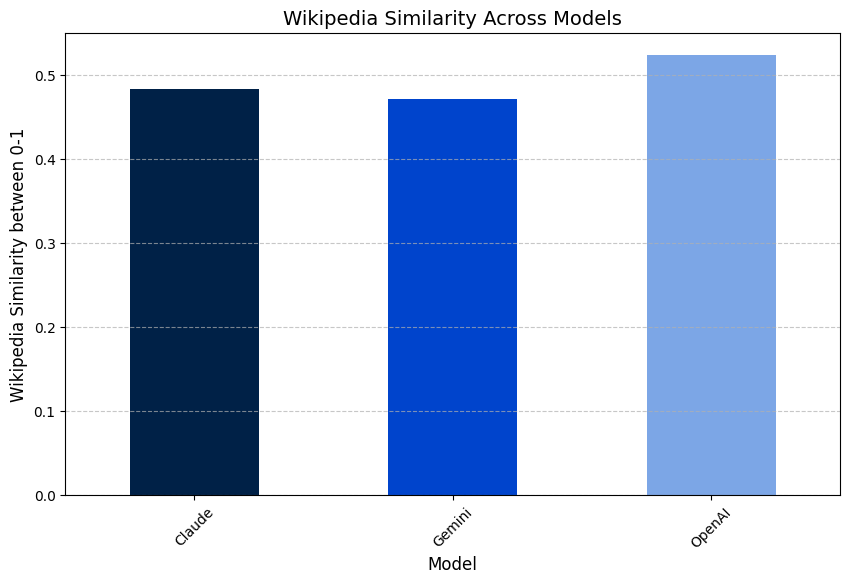

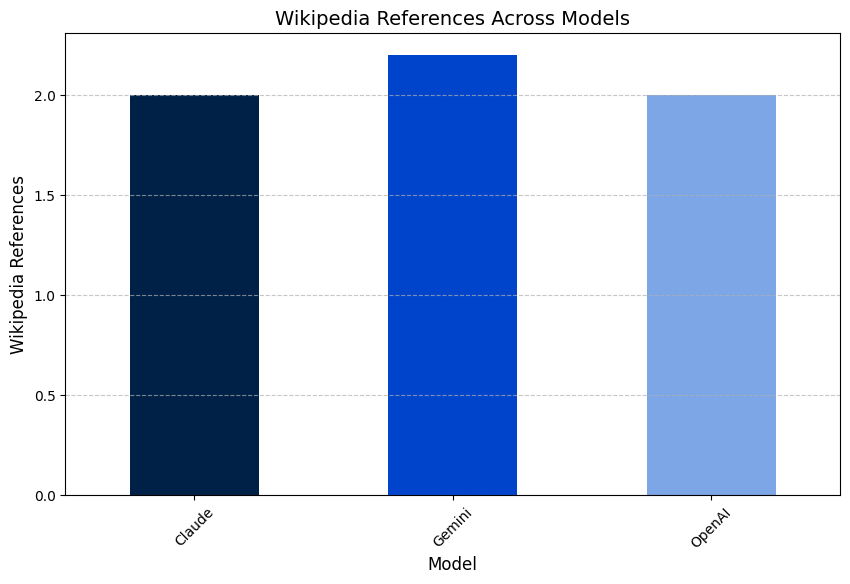

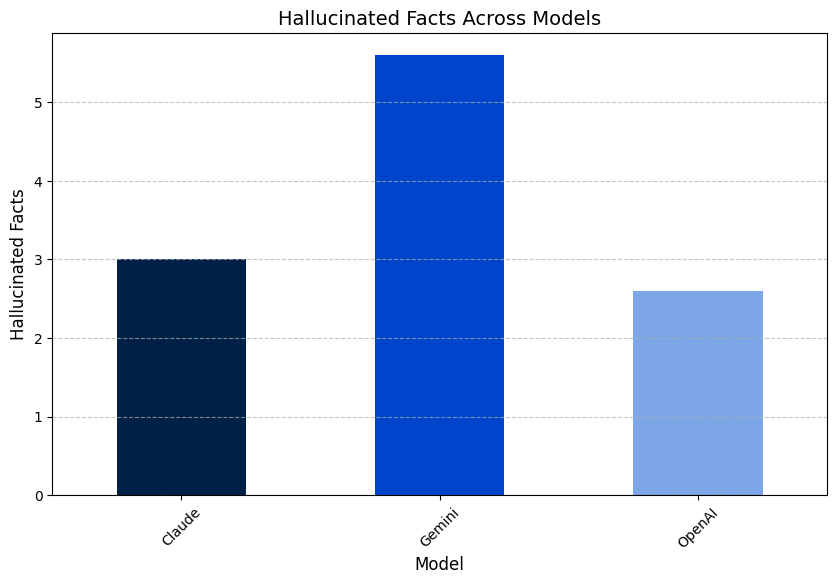

In [ ]:


def plot_wikipedia_evaluation(df_results):
    """
    Plots Wikipedia similarity, references, and hallucinated facts for each model.

    Args:
    - df_results (pd.DataFrame): DataFrame containing Wikipedia evaluation results.
    """
    metrics = ["Wikipedia Similarity between 0-1", "Wikipedia References", "Hallucinated Facts"]
    titles = [
        "Wikipedia Similarity Across Models",
        "Wikipedia References Across Models",
        "Hallucinated Facts Across Models"
    ]

    for metric, title in zip(metrics, titles):
        plt.figure(figsize=(10, 6))
        df_results.groupby("Model")[metric].mean().plot(kind="bar", color=["#002147", "#0044CC", "#7CA6E6"], edgecolor="none")

        plt.title(title, fontsize=14)
        plt.xlabel("Model", fontsize=12)
        plt.ylabel(metric, fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        plt.show()

# Call the function to generate plots
plot_wikipedia_evaluation(df_wiki_results)






## **Best Model Selection**



**Overall Score Computation**


The **overall score** is used to rank models based on their **Wikipedia accuracy, reference usage, and hallucination levels**. It is computed as:

Overall Score  = Wikipedia Similarity + Wikipedia References - Hallucinated Facts

| **Metric**                | **Definition** |
|---------------------------|--------------|
| **Wikipedia Similarity**  | Measures how similar the AI-generated report is to Wikipedia. A higher value indicates stronger alignment with factual sources. |
| **Wikipedia References**  | Counts the number of Wikipedia citations used in the report. A higher count means better factual backing. |
| **Hallucinated Facts**    | Measures incorrect or unverified statements. **Lower values are better**. Since hallucinations are bad, we subtract this from the score. |

---

 **Model Ranking & Selection Process**
This process ensures only **the most reliable model** is selected for refinement.

| **Step**                          | **Action** |
|----------------------------------|-----------|
| **Step 1: Drop Invalid JSON Reports** | If a model generates even **one invalid JSON report**, it is **automatically dropped** from ranking. |
| **Step 2: Drop Incomplete Structures** | If a model has **incomplete JSON structure** (missing required fields), it is **also dropped**. |
| **Step 3: Compute Scores for Remaining Models** | Models **passing JSON & structure checks** are evaluated based on their **overall score formula**. |
| **Step 4: Rank Models** | Models are ranked in **descending order** of overall score. |
| **Step 5: Select Best & Second-Best Models** | The **top-ranked model** is the **best**, and the **second-ranked model** is used for **refinement**. |

---

 **Final Model Selection**
- **Best Model:** The highest-ranked model after all filtering.
- **Second-Best Model:** The next best model, used to refine the best model's reports.

This ensures that **only high-quality models are used** for generating and refining industry reports.


In [ ]:
import pandas as pd

# Constants for column values
INVALID_JSON = "Failed (Invalid JSON)"
INCOMPLETE_STRUCTURE = "Failed (Incomplete Structure)"
PASSED = "Passed"
NOT_RANKED = "Not Ranked"
DROPPED = "Dropped"

# Merge JSON validity and structure results with Wikipedia metrics
df_combined = df_wiki_results.merge(df_json_validity, on=["Model", "Industry"], how="left")
df_combined = df_combined.merge(df_structure_validity, on=["Model", "Industry"], how="left")

# Identify models with invalid JSON
invalid_json_models = df_combined[df_combined["JSON Valid"] == "Invalid"]["Model"].unique()

# Identify models with incomplete report structure
incomplete_structure_models = df_combined[df_combined["Report Structure"] == "Incomplete Report Structure"]["Model"].unique()

# Filter models that passed both checks
df_valid_models = df_combined[
    (~df_combined["Model"].isin(invalid_json_models)) &
    (~df_combined["Model"].isin(incomplete_structure_models))
].copy()

# Normalize hallucinated facts (lower is better)
df_valid_models["Hallucinated Facts (Normalized)"] = df_valid_models["Hallucinated Facts"] * -1

# Compute Overall Score
df_valid_models["Overall Score"] = (
    df_valid_models["Wikipedia Similarity between 0-1"] +
    df_valid_models["Wikipedia References"] +
    df_valid_models["Hallucinated Facts (Normalized)"]
)

# Rank valid models based on overall score
df_model_ranking = df_valid_models.groupby("Model")["Overall Score"].mean().reset_index()
df_model_ranking = df_model_ranking.sort_values(by="Overall Score", ascending=False).reset_index(drop=True)

# Assign rankings
df_model_ranking["Final Rank"] = df_model_ranking.index + 1

# Create Explanation Table
explanation_data = []
all_models = set(df_wiki_results["Model"].unique())  # Get all evaluated models

for model in all_models:
    if model in invalid_json_models:
        json_valid = INVALID_JSON
        structure_valid = "Not Evaluated"
        overall_score = NOT_RANKED
        final_rank = DROPPED
    elif model in incomplete_structure_models:
        json_valid = PASSED
        structure_valid = INCOMPLETE_STRUCTURE
        overall_score = NOT_RANKED
        final_rank = DROPPED
    else:
        json_valid = PASSED
        structure_valid = PASSED
        overall_score = round(df_model_ranking[df_model_ranking["Model"] == model]["Overall Score"].values[0], 2)
        final_rank = df_model_ranking[df_model_ranking["Model"] == model]["Final Rank"].values[0]

    explanation_data.append({
        "Model": model,
        "JSON Validity": json_valid,
        "Structure Validity": structure_valid,
        "Overall Score": overall_score,
        "Final Rank": final_rank
    })

# Convert to DataFrame
df_explanation = pd.DataFrame(explanation_data)

# Ensure Dropped Models Appear Last in the Table
df_explanation["SortOrder"] = df_explanation["Final Rank"].apply(lambda x: 999 if x == DROPPED else x)
df_explanation = df_explanation.sort_values(by="SortOrder").drop(columns=["SortOrder"]).reset_index(drop=True)

# Display Model Ranking
import IPython.display as display
display.display(df_explanation)

# Identify the best and second-best models
best_model = df_model_ranking.iloc[0]["Model"] if not df_model_ranking.empty else None
second_best_model = df_model_ranking.iloc[1]["Model"] if len(df_model_ranking) > 1 else None

# Print Selected Models
print(f"Best Model: {best_model}")
print(f"Second Best Model: {second_best_model}")


,Model,JSON Validity,Structure Validity,Overall Score,Final Rank
0,OpenAI,Passed,Passed,-0.08,1
1,Claude,Passed,Passed,-0.52,2
2,Gemini,Failed (Invalid JSON),Not Evaluated,Not Ranked,Dropped


Best Model: OpenAI
Second Best Model: Claude


## **AI Report Refinement and Testing**




### **Updated Table: `refine_industry_report` Process**
This table summarizes **each step in the `refine_industry_report` function**, explaining **what happens, why it's done, and its expected output**.

| **Step** | **Process** | **What Happens?** | **Why?** | **Expected Output** |
|----------|------------|------------------|---------|----------------------|
| **1** | **Initialize Variables** | - Set `iteration = 0` <br> - Store initial `current_report` generated by **Second Best Model** <br> - Initialize `evaluation_results` list | Keeps track of the **best report**, **iteration count**, and **evaluation scores** | Variables initialized for tracking report refinement |
| **2** | **Set Required Sections** | If `required_sections` is **None**, set it to `["industry", "overview", "market_trends", "key_players", "opportunities", "challenges", "regional_insights", "references"]` | Ensures every report has all **necessary sections** before validation | `required_sections` list is set |
| **3** | **Start Iterative Refinement Loop** | While `iteration < max_iterations` <br> - Increase `iteration` count | Limits how many times the report can be **refined** to prevent infinite loops | Refinement loop begins |
| **4** | **Best Model Evaluates the Report** | Send `current_report` (generated by **Second Best Model**) to **Best Model** for evaluation <br> Best Model returns **JSON response** containing: <br> - `hallucination_score` (0-10) <br> - `wikipedia_similarity` (0-1) <br> - `number_of_references` <br> - `json_validity` (`Yes`/`No`) <br> - `structure_validity` (`Yes`/`No`) <br> - `word_count` | Ensures **the report meets quality standards**, detects hallucinations, and checks structure | Best Model provides **structured JSON evaluation** |
| **5** | **Extract Evaluation Metrics** | Parse **Best Model’s JSON response** <br> - Extract `hallucination_score`, `similarity_score`, `reference_count`, etc. <br> - Store these values in `evaluation_results` | Stores **important quality metrics** for later reference | Extracted values stored in **structured DataFrame** |
| **6** | **Compute Overall Score** | `overall_score = similarity_score + reference_count - hallucination_score` | Helps compare **different iterations** of the report for improvement tracking | A numerical **overall score** is generated |
| **7** | **Check if Refinement is Needed** | If: <br> - `hallucination_score == 0` <br> - `json_validity == "Yes"` <br> - `structure_validity == "Yes"` <br> - `word_count <= 600` <br> **Then:** Stop refinement | Stops refining when **all conditions are met** to avoid unnecessary processing | **Loop exits if report meets all conditions** |
| **8** | **Refine Report if Needed** | If conditions **aren't met**, repeat steps: <br> - Send updated report back to **Second Best Model** for improvement <br> - **Best Model evaluates** new version <br> - Continue refining until **all checks pass** or `max_iterations` is reached | Ensures **step-by-step improvements** to the report | Report is progressively improved |
| **9** | **Store Final Evaluation Results** | Convert `evaluation_results` list into a **pandas DataFrame** | Provides a **clear, structured** summary of **all iterations** | Structured **table output** |
| **10** | **Print Summary Table** | Display the **evaluation table** summarizing all iterations | Provides a **clear view of report improvement** over time | **Table format of refinement process** |



In [ ]:
test_prompt = """
You are a skilled market research assistant helping business analysts understand industries effectively.
Your task is to generate a clear, structured, and fact-based industry report using only information from Wikipedia.

### **Instructions:**
- **Fact-based:** Use only verified information from Wikipedia.
- **Industry-Specific:** The report must strictly focus on **{industry}**. Do not include any unrelated industries.
- **Word Count Range:** Ensure the entire report is between 400 and 600 words.
- **Concise:** Keep explanations clear and to the point, avoiding unnecessary details.
- **Consistent JSON format:** Structure the output in a well-formatted JSON format for easy readability.
- **Missing Data Handling:** If data is unavailable on Wikipedia, return **"Can't find on Wikipedia"** instead of making assumptions.
- **No External Data:** Do not use non-Wikipedia sources, estimations, or assumptions.

### **Report Format (JSON Output):**
{{
  "industry": "{industry}",
  "overview": {{
    "definition": "{{Brief, clear definition of the industry from Wikipedia or 'Can't find on Wikipedia'}}",
    "significance": "{{Why this industry is important (economic, technological, environmental, or societal impact) from Wikipedia or 'Can't find on Wikipedia'}}",
    "history": "{{Key historical milestones relevant to the industry from Wikipedia or 'Can't find on Wikipedia'}}",
    "key_products": [
      "{{List of major products or services provided by the industry from Wikipedia or 'Can't find on Wikipedia'}}"
    ],
    "market_size_and_growth_rate": "{{Global market size, growth rate, and CAGR over a specific period from Wikipedia or 'Can't find on Wikipedia'}}"
  }},
  "geographical_distribution": {{
    "leading_regions": "{{Major countries or regions dominating the industry from Wikipedia or 'Can't find on Wikipedia'}}",
    "emerging_markets": "{{Regions with high growth potential from Wikipedia or 'Can't find on Wikipedia'}}"
  }},
  "regulatory_landscape": {{
    "key_regulations": "{{Major global or regional regulations affecting the industry from Wikipedia or 'Can't find on Wikipedia'}}",
    "governing_bodies": "{{Regulatory authorities overseeing industry operations from Wikipedia or 'Can't find on Wikipedia'}}"
  }},
  "technological_innovations": [
    {{
      "technology": "{{Name of technology from Wikipedia or 'Can't find on Wikipedia'}}",
      "description": "{{How this technology is applied in the industry from Wikipedia or 'Can't find on Wikipedia'}}",
      "impact": "{{How this innovation is transforming the sector from Wikipedia or 'Can't find on Wikipedia'}}"
    }}
  ],
  "market_trends": [
    {{
      "trend": "{{Trend Name from Wikipedia or 'Can't find on Wikipedia'}}",
      "description": "{{Detailed explanation of the trend with numerical evidence where applicable from Wikipedia or 'Can't find on Wikipedia'}}",
      "impact": "{{How this trend influences the industry’s direction from Wikipedia or 'Can't find on Wikipedia'}}",
      "source": "{{Wikipedia section reference or 'Can't find on Wikipedia'}}"
    }}
  ],
  "key_players": [
    {{
      "company": "{{Company Name from Wikipedia or 'Can't find on Wikipedia'}}",
      "description": "{{Company's role in the industry from Wikipedia or 'Can't find on Wikipedia'}}",
      "market_position": "{{Market share, ranking, or influence with year from Wikipedia or 'Can't find on Wikipedia'}}",
      "ownership": "{{Publicly traded or privately owned from Wikipedia or 'Can't find on Wikipedia'}}",
      "headquarters": "{{Company headquarters location from Wikipedia or 'Can't find on Wikipedia'}}",
      "employee_count": "{{Number of employees with year from Wikipedia or 'Can't find on Wikipedia'}}",
      "financials": {{
        "annual_revenue": "{{Latest revenue with year from Wikipedia or 'Can't find on Wikipedia'}}",
        "net_profit": "{{Most recent net profit/loss with year from Wikipedia or 'Can't find on Wikipedia'}}",
        "stock_price": "{{Current stock price if publicly traded from Wikipedia or 'Can't find on Wikipedia'}}",
        "market_cap": "{{Market capitalization value from Wikipedia or 'Can't find on Wikipedia'}}"
      }},
      "wikipedia_url": "{{Direct Wikipedia page link or 'Can't find on Wikipedia'}}"
    }}
  ],
  "opportunities": [
    {{
      "opportunity": "{{Business Opportunity from Wikipedia or 'Can't find on Wikipedia'}}",
      "description": "{{A growth or innovation opportunity within the industry from Wikipedia or 'Can't find on Wikipedia'}}",
      "reasoning": "{{Why this opportunity exists and how businesses can capitalize on it from Wikipedia or 'Can't find on Wikipedia'}}",
      "source": "{{Wikipedia reference or 'Can't find on Wikipedia'}}"
    }}
  ],
  "challenges": [
    {{
      "challenge": "{{Industry Challenge from Wikipedia or 'Can't find on Wikipedia'}}",
      "description": "{{A major obstacle or risk faced by the industry from Wikipedia or 'Can't find on Wikipedia'}}",
      "implication": "{{How this challenge affects businesses and potential solutions from Wikipedia or 'Can't find on Wikipedia'}}",
      "source": "{{Wikipedia reference or 'Can't find on Wikipedia'}}"
    }}
  ],
  "future_outlook": {{
    "growth_projections": "{{Predicted market size or CAGR for the next 5-10 years from Wikipedia or 'Can't find on Wikipedia'}}",
    "disruptive_factors": "{{Technological advancements, regulatory changes, or economic factors affecting the industry from Wikipedia or 'Can't find on Wikipedia'}}",
    "key_recommendations": "{{Strategic insights for businesses or investors on adapting to future changes from Wikipedia or 'Can't find on Wikipedia'}}"
  }},
  "references": [
    {{
      "source": "Wikipedia",
      "url": "https://en.wikipedia.org/wiki/{industry}"
    }}
  ]
}}

### **Word Count Guidelines:**
- **Overview Section (200 words total):**
  - Definition: 30–50 words
  - Significance: 30–50 words
  - History: 40–60 words
  - Key Products: 40–60 words
  - Market Size and Growth Rate: 40–50 words

- **Geographical Distribution (50 words total):**
  - Leading Regions: 30–40 words
  - Emerging Markets: 10–20 words

- **Regulatory Landscape (50 words total):**
  - Key Regulations: 20–30 words
  - Governing Bodies: 20–30 words

- **Technological Innovations (50 words total):**
  - Technology details: 30–40 words
  - Impacts: 10–20 words

- **Market Trends (50 words total):**
  - Each Trend (up to 3 trends): ~15 words each
  - Impact and source: 5–10 words each

- **Key Players (50 words total):**
  - Company details: ~25 words for 2 companies
  - Financials and market position: ~25 words

- **Opportunities (50 words total):**
  - Opportunity details: 30–40 words
  - Reasoning and source: 10–20 words

- **Challenges (50 words total):**
  - Challenge details: 30–40 words
  - Implications and source: 10–20 words

- **Future Outlook (50 words total):**
  - Growth Projections: 20–30 words
  - Disruptive Factors: 10–20 words
  - Recommendations: 10–20 words

### **Important Final Note:**
- **Double-check the industry name in the report.** The output **must match** `{industry}`.
- **If incorrect information is generated, discard and regenerate the report.**
- **Do not substitute another industry if data is missing. Instead, state "Can't find on Wikipedia".**

Generate a Wikipedia-based industry report between 400 and 600 words for: **{industry}**.
"""

In [ ]:
import json
import time
from fpdf import FPDF

# Function to count Wikipedia references in JSON
def count_wikipedia_references(json_data):
    """
    Recursively counts Wikipedia references in the entire JSON structure.
    """
    if isinstance(json_data, dict):
        return sum(count_wikipedia_references(value) for value in json_data.values())
    elif isinstance(json_data, list):
        return sum(count_wikipedia_references(item) for item in json_data)
    elif isinstance(json_data, str):
        return json_data.count("https://en.wikipedia.org/wiki/")
    return 0

# Function to request evaluation from the best model
def evaluate_report_with_best_model(best_model, report_text, test_prompt, industry):
    """
    Uses the best model to evaluate the report generated by the second-best model.
    """
    try:
        report_json = json.loads(report_text)  # Ensure valid JSON structure
        wikipedia_ref_count = count_wikipedia_references(report_json)  # Count references correctly
    except json.JSONDecodeError:
        print("Error: Report is not valid JSON")
        return {"error": "Invalid JSON in evaluation"}

    # Use industry-specific prompt
    evaluation_prompt = f"""
    You are a strict evaluator assessing an industry report. The report should be based **only on Wikipedia data**.
    Your task is to evaluate the given report using these metrics:

    - **Wikipedia Similarity (0-1):** How closely does the report align with Wikipedia content?
    - **Wikipedia References (Count):** How many direct Wikipedia citations are present? (We already counted: {wikipedia_ref_count})
    - **Hallucinated Facts (Count):** How many facts are not supported by Wikipedia?
    - **Valid JSON Structure (Yes/No):** Is the report in a correct JSON format?
    - **Structural Consistency (Yes/No):** Does the report contain all required sections?
    - **Word Count (Integer):** How many words are in the report?

    Test Prompt:
    {test_prompt.format(industry=industry)}

    Evaluate the following report:
    {report_text}

    Provide the evaluation **strictly in valid JSON format**, no extra text:
    {{
        "Wikipedia Similarity": float (0-1),
        "Wikipedia References": {wikipedia_ref_count},
        "Hallucinated Facts": int,
        "Valid JSON Structure": "Yes" or "No",
        "Structural Consistency": "Yes" or "No",
        "Word Count": int
    }}
    """

    print("\nEvaluating the report...")
    start_time = time.time()
    messages = [HumanMessage(content=evaluation_prompt)]
    response = best_model.chat(messages)
    end_time = time.time()

    try:
        evaluation_result = json.loads(response.content)
        evaluation_result["Evaluation Time"] = end_time - start_time  # Add response time
        evaluation_result["Wikipedia References"] = wikipedia_ref_count  # Ensure correct count
        print("\nEvaluation results:")
        print(f"  - Wikipedia Similarity: {evaluation_result.get('Wikipedia Similarity', 'N/A')}")
        print(f"  - Wikipedia References: {evaluation_result.get('Wikipedia References', 'N/A')}")
        print(f"  - Hallucinated Facts: {evaluation_result.get('Hallucinated Facts', 'N/A')}")
        print(f"  - Valid JSON Structure: {evaluation_result.get('Valid JSON Structure', 'N/A')}")
        print(f"  - Structural Consistency: {evaluation_result.get('Structural Consistency', 'N/A')}")
        print(f"  - Word Count: {evaluation_result.get('Word Count', 'N/A')}")
        return evaluation_result
    except json.JSONDecodeError:
        print("Error: Invalid JSON response from best model")
        return {"error": "Invalid JSON response from best model"}

# Function to refine the report iteratively
def refine_report_until_best(best_model, second_best_model, industry, test_prompt, max_iterations=5):
    """
    Iteratively refines the second-best model’s report until an optimal version is achieved.
    """
    print("\nGenerating the initial report...\n")
    initial_prompt = test_prompt.format(industry=industry)  # Correct placeholder used here
    messages = [HumanMessage(content=initial_prompt)]
    response = second_best_model.chat(messages)

    try:
        report_text = json.loads(response.content)
        print("\nInitial report generated successfully.\n")
    except json.JSONDecodeError:
        print("Error: Initial report from the second-best model is not valid JSON.")
        return None

    iteration = 0
    while iteration < max_iterations:
        print(f"\nIteration {iteration + 1}: Evaluating the report...\n{'-'*50}")
        evaluation = evaluate_report_with_best_model(best_model, json.dumps(report_text), test_prompt, industry)

        # Check if the initial report meets the criteria
        if evaluation.get("Wikipedia Similarity", 0.5) >= 0.85 and \
           evaluation.get("Wikipedia References", 1) >= 1 and \
           evaluation.get("Hallucinated Facts", 2) <= 1 and \
           evaluation.get("Valid JSON Structure", "No") == "Yes" and \
           evaluation.get("Structural Consistency", "No") == "Yes" and \
           300 <= evaluation.get("Word Count", 100) <= 600:
            print("\nInitial report meets realistic criteria. No refinement needed.")
            return json.dumps(report_text, indent=4)

        # Otherwise, refine the report
        print("\nRefining the report...\n")
        refinement_prompt = f"""
        You are an AI assistant improving an industry report based on evaluation feedback.
        The report must be strictly based **only on Wikipedia data** and be in a structured JSON format.
        If any data is not found on Wikipedia, replace it with "Can't find on Wikipedia" instead of making assumptions.

        **Test Prompt:**
        This was the test prompt:
        {test_prompt.format(industry=industry)}

        **Evaluation Findings:**
        - Wikipedia Similarity: {evaluation.get("Wikipedia Similarity", 0)}
        - Wikipedia References: {evaluation.get("Wikipedia References", 0)}
        - Hallucinated Facts: {evaluation.get("Hallucinated Facts", 0)}
        - Valid JSON Structure: {evaluation.get("Valid JSON Structure", "No")}
        - Structural Consistency: {evaluation.get("Structural Consistency", "No")}
        - Word Count: {evaluation.get("Word Count", 100)}

        Improve the report based on this feedback and return only valid JSON.
        """

        messages = [HumanMessage(content=refinement_prompt)]
        response = best_model.chat(messages)

        try:
            report_text = json.loads(response.content)
            print("\nRefinement complete.\n")
        except json.JSONDecodeError:
            print("Refinement failed due to invalid JSON response, retrying...\n")
            continue  # Retry without stopping the loop

        iteration += 1

    print("\nMax iterations reached. Returning the latest refined report.\n")
    return json.dumps(report_text, indent=4)





In [ ]:
best_model = models[df_model_ranking.iloc[0]["Model"]]
second_best_model = models[df_model_ranking.iloc[1]["Model"]]




# Loop through each industry and refine the report
for industry in test_industries:
    print(f"Processing report for industry: {industry}")
    result = refine_report_until_best(
        best_model=best_model,
        second_best_model=second_best_model,
        industry=industry,
        max_iterations=1,
        test_prompt=test_prompt
    )

    if result is not None:
        # Save the JSON result into a PDF
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=9)
        pdf.multi_cell(0, 10, result)
        pdf_file_name = f"{industry}_report.pdf"
        pdf.output(pdf_file_name)
        print(f"Saved report as: {pdf_file_name}")
    else:
        print(f"Failed to generate report for {industry}")


Processing report for industry: Renewable Energy

Generating the initial report...


Initial report generated successfully.


Iteration 1: Evaluating the report...
--------------------------------------------------

Evaluating the report...

Evaluation results:
  - Wikipedia Similarity: 0.9
  - Wikipedia References: 2
  - Hallucinated Facts: 0
  - Valid JSON Structure: Yes
  - Structural Consistency: Yes
  - Word Count: 238

Refining the report...


Refinement complete.


Max iterations reached. Returning the latest refined report.

Saved report as: Renewable Energy_report.pdf
Processing report for industry: Fashion & Apparel

Generating the initial report...


Initial report generated successfully.


Iteration 1: Evaluating the report...
--------------------------------------------------

Evaluating the report...

Evaluation results:
  - Wikipedia Similarity: 1.0
  - Wikipedia References: 2
  - Hallucinated Facts: 0
  - Valid JSON Structure: Yes
  - Structural Consistency: Yes
  - Wor

## **Final AI Generated Report**

In [ ]:

test_industries = [
    "Aluminium",
    "Advertising",
    "Internet Services & Infrastructure",
    "Automobile Manufacturers",
    "Automobile Manufacturers in South Korea"
]



best_model = models[df_model_ranking.iloc[0]["Model"]]
second_best_model = models[df_model_ranking.iloc[1]["Model"]]




# Loop through each industry and refine the report
for industry in test_industries:
    print(f"Processing report for industry: {industry}")
    result = refine_report_until_best(
        best_model=best_model,
        second_best_model=second_best_model,
        industry=industry,
        max_iterations=1,
        test_prompt=test_prompt
    )

    if result is not None:
        # Save the JSON result into a PDF
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=9)
        pdf.multi_cell(0, 10, result)
        pdf_file_name = f"{industry}_report.pdf"
        pdf.output(pdf_file_name)
        print(f"Saved report as: {pdf_file_name}")
    else:
        print(f"Failed to generate report for {industry}")

Processing report for industry: Aluminium

Generating the initial report...


Initial report generated successfully.


Iteration 1: Evaluating the report...
--------------------------------------------------

Evaluating the report...

Evaluation results:
  - Wikipedia Similarity: 0.9
  - Wikipedia References: 2
  - Hallucinated Facts: 0
  - Valid JSON Structure: Yes
  - Structural Consistency: Yes
  - Word Count: 204

Refining the report...


Refinement complete.


Max iterations reached. Returning the latest refined report.

Saved report as: Aluminium_report.pdf
Processing report for industry: Advertising

Generating the initial report...


Initial report generated successfully.


Iteration 1: Evaluating the report...
--------------------------------------------------

Evaluating the report...

Evaluation results:
  - Wikipedia Similarity: 0.9
  - Wikipedia References: 2
  - Hallucinated Facts: 0
  - Valid JSON Structure: Yes
  - Structural Consistency: Yes
  - Word Count: 230

Refini